# Практика №1

## Сроки
Дата выдачи: 05.10.2023 <br/>
Дедлайн: 18.10.2023 23:59MSK

## О выполнении заданий

### Как сдавать
Пошарить ссылку на колаб с решением через телеграм или почту.<br/>

### Баллы
У каждого задания в скобках указана его "стоимость" - максимальное количество баллов, которое можно получить за выполнение. Если задание сделано не полностью, но сделано что-то осмысленное, будет выставлена половина стоимости.

## Библиотеки

При выполнении заданий использовать библиотеки opencv, numpy, matplotlib, Pillow. Все эти библиотеки доступны по дефолту в колабе.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt

## Prepare files

In [ ]:
!wget https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/giraffe1.jpg
!wget https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/giraffe2.jpg
!wget https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/cameraman_salt_and_pepper.png

--2024-04-17 12:26:06--  https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/giraffe1.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘giraffe1.jpg.1’

giraffe1.jpg.1          [ <=>                ] 145.66K  --.-KB/s    in 0.04s   

2024-04-17 12:26:06 (3.85 MB/s) - ‘giraffe1.jpg.1’ saved [149155]

--2024-04-17 12:26:07--  https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/giraffe2.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘giraffe2.jpg.1’

giraffe2.jpg.1          [ <=>                ] 145.67K  --.-KB/s    in 0.04s   

2024-04-17 12:26:07 (3.77 MB/s) - ‘giraffe2.jpg.1’ saved [149164]

--2024-04-

## Задание №1
\[5 баллов\]
Отделить жирафа из [giraffe1.jpg](https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/giraffe1.jpg) от фона, используя разные цветовые пространства и бинаризацию.

Можно получить дополнительные 5 баллов за выдающуюся точность сегментации.

Ожидаемый результат:

![image.png](https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/expected.png?raw=true)

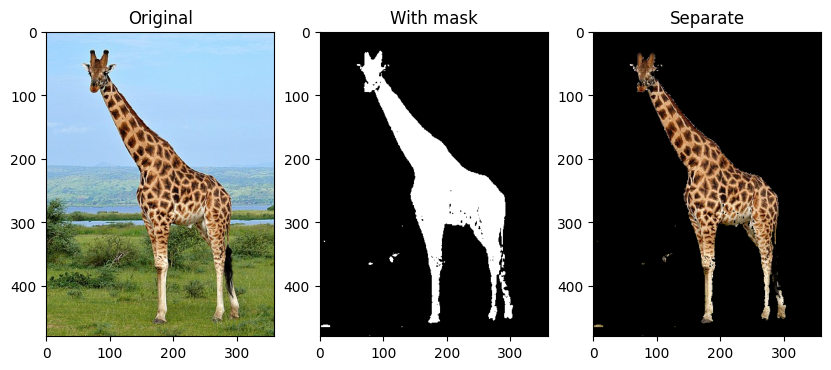

In [ ]:
# read image file
src = cv.imread('giraffe1.jpg')
# image to HSV
hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)

# separate colors
lower_green = np.array([25, 0, 0])
upper_green = np.array([90, 255, 255])
lower_blue = np.array([25, 0, 0])
upper_blue = np.array([130, 255, 255])
mask_green = cv.inRange(hsv, lower_green, upper_green)
mask_blue = cv.inRange(hsv, lower_blue, upper_blue)
background_mask = cv.bitwise_or(mask_green, mask_blue)
background_mask_inv = cv.bitwise_not(background_mask)

result = cv.bitwise_and(src, src, mask=background_mask_inv)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(background_mask_inv, cmap='gray'), plt.title('With mask')
plt.subplot(133), plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB)), plt.title('Separate')
plt.show()

## Задание №2
\[5 баллов\]
Удалить с изображения [cameraman_salt_and_pepper.png](https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/cameraman_salt_and_pepper.png) шум "соль и перец", используя морфологические операции и/или сглаживание.

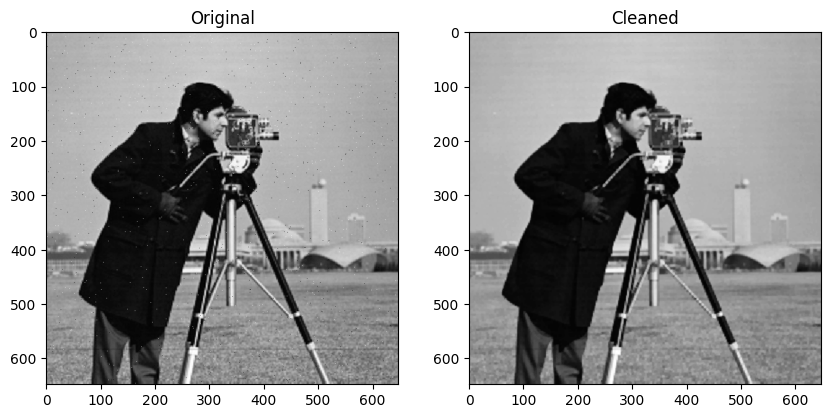

In [ ]:
src = cv.imread('cameraman_salt_and_pepper.png', cv.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)

filtered_image = cv.morphologyEx(src, cv.MORPH_OPEN, kernel)
filtered_image = cv.morphologyEx(filtered_image, cv.MORPH_CLOSE, kernel)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(src, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Cleaned')
plt.imshow(filtered_image, cmap='gray')

plt.show()

## Задание №3
\[10 баллов\]
Отделить жирафа из [giraffe2.jpg](https://github.com/MedAI-Lab-ITMO/computer-vision-course/blob/main/homeworks/hw1/giraffe2.jpg) от фона, используя разные цветовые пространства, бинаризацию, морфологические операции. Можно работать с разными частями изображения по-разному.

Можно получить дополнительные 5 баллов за выдающуюся точность сегментации.

In [ ]:
from google.colab.patches import cv2_imshow as show

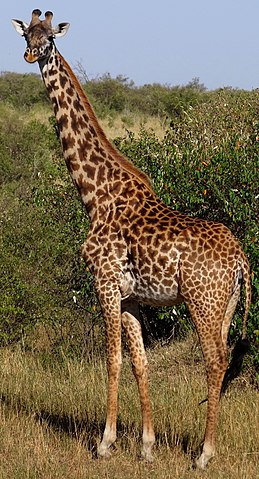

In [ ]:
src = cv.imread('giraffe2.jpg')
show(src)

# Вариант 1

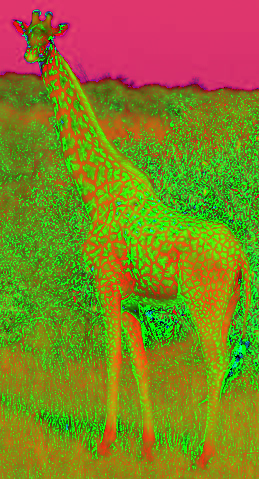

In [ ]:
hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)
show(hsv)

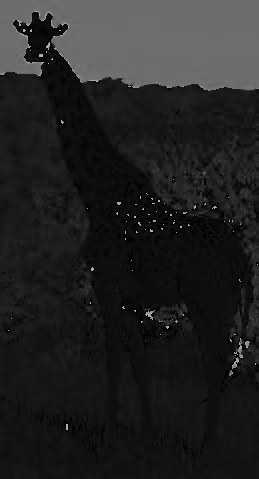

In [ ]:
show(hsv[..., 0])

In [ ]:
# check image size
src.shape

(479, 259, 3)

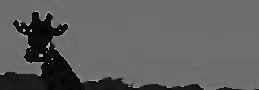

In [ ]:
hsv_head = hsv[0:90, :, 0]
show(hsv_head)

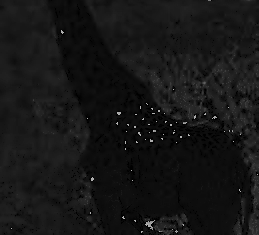

In [ ]:
hsv_body = hsv[90:325, :, 0]
show(hsv_body)

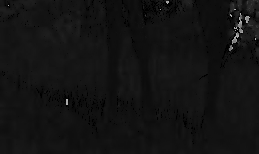

In [ ]:
hsv_footer = hsv[325:, :, 0]
show(hsv_footer)

In [ ]:
def plot_hist(image):
    plt.hist(image.flatten(), 256, [0, 256], color='b')
    plt.show()

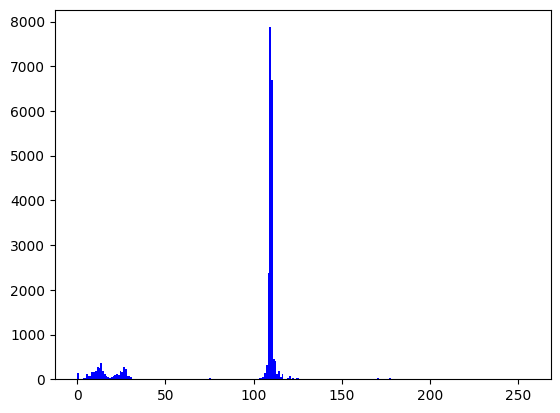

In [ ]:
plot_hist(hsv_head)

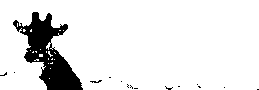

In [ ]:
head_mask = np.where(hsv_head > 17, 255, 0)
show(head_mask)

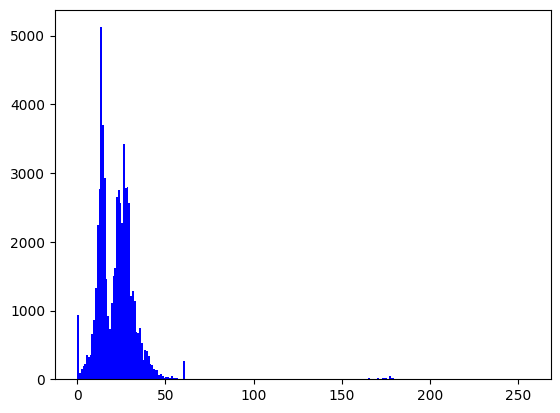

In [ ]:
plot_hist(hsv_body)



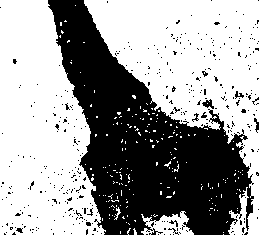

In [ ]:
body_mask = np.where(hsv_body > 16, 255, 0)
show(body_mask)

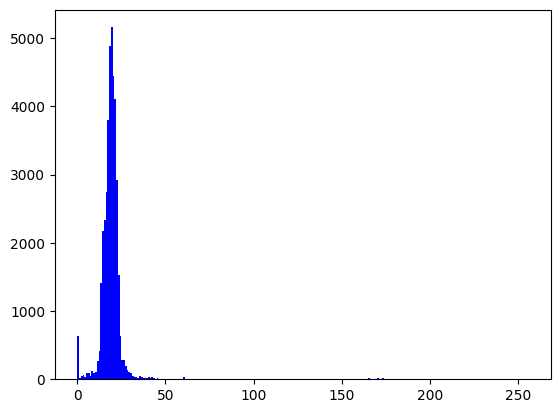

In [ ]:
plot_hist(hsv_footer)

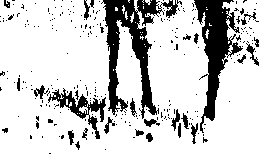

In [ ]:
footer_mask = np.where(hsv_footer > 15, 255, 0)
show(footer_mask)

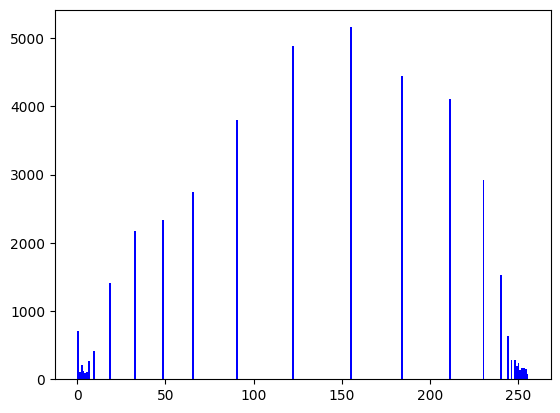

In [ ]:
egray_footer = cv.equalizeHist(hsv_footer)
plot_hist(egray_footer)

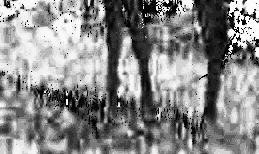

In [ ]:
show(egray_footer)

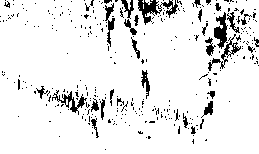

In [ ]:
extra_footer_mask = np.where(egray_footer < 19, 0, 255)
show(extra_footer_mask)

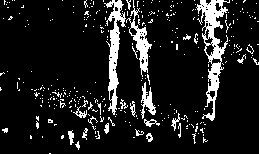

In [ ]:
logic = np.logical_and(egray_footer > 18, egray_footer < 49)
footer_emask = np.where(logic, 255, 0)
show(footer_emask)

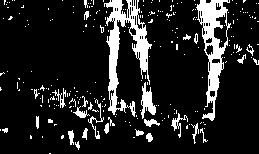

In [ ]:
kernel = np.array([[-3, 0, 4], [-10, 0, 11], [-3, 0, 4]])
close_footer_emask = cv.morphologyEx(footer_emask.astype(np.uint8), cv.MORPH_CLOSE, kernel.astype(np.uint8))
show(close_footer_emask)

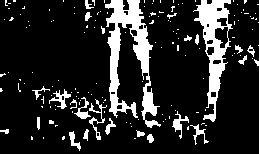

In [ ]:
kernel = np.ones((2, 2))
show(cv.morphologyEx(close_footer_emask.astype(np.uint8), cv.MORPH_CLOSE, kernel.astype(np.uint8)))

# Вариант 2

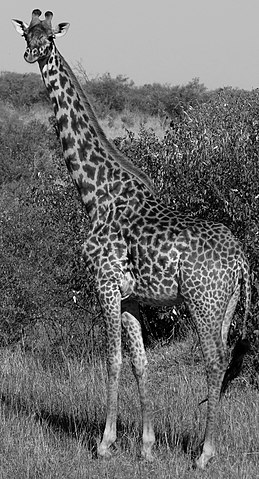

In [ ]:
gray = cv.imread('giraffe2.jpg', cv.IMREAD_GRAYSCALE)
show(gray)

## Image equalizing

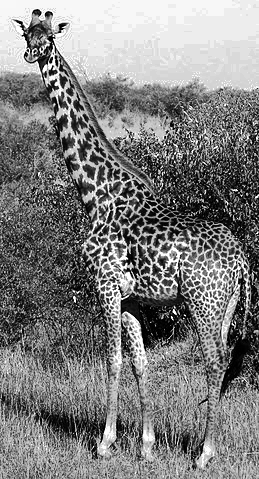

In [ ]:
img = cv.equalizeHist(gray)
show(img)

## ROI

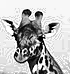

In [ ]:
head_img = img[0:74, 10:80]
show(head_img)

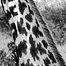

In [ ]:
neck_img = img[74:140, 41:107]
show(neck_img)

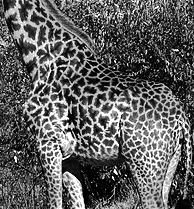

In [ ]:
body_img = img[140:349, 59:253]
show(body_img)

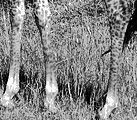

In [ ]:
legs_img = img[349:469, 97:234]
show(legs_img)

## Binarize

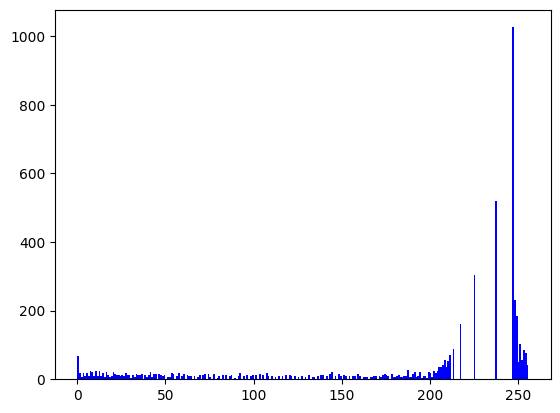

In [ ]:
plot_hist(head_img)

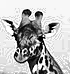

In [ ]:
show(head_img)

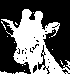

In [ ]:
head_mask = np.where(head_img < 207, 255, 0)
show(head_mask)

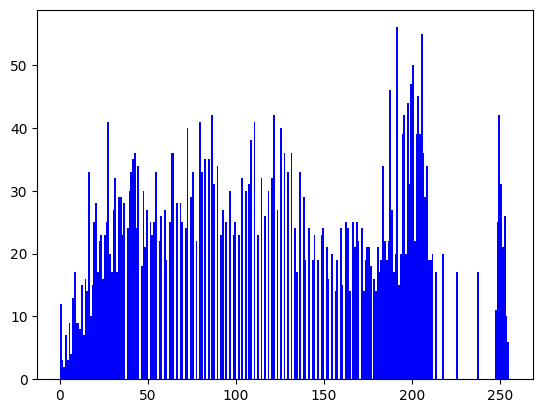

In [ ]:
plot_hist(neck_img)

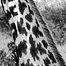

In [ ]:
show(neck_img)

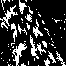

In [ ]:
neck_mask = np.where(neck_img < 47, 255, 0)
show(neck_mask)

## Morphological Transformations

### Head

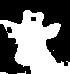

In [ ]:
kernel = np.ones((4, 4))
closed_head_mask = cv.morphologyEx(head_mask.astype(np.uint8), cv.MORPH_CLOSE, kernel.astype(np.uint8))
show(closed_head_mask)

### Neck

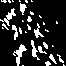

In [ ]:
# Open
kernel = np.array([[1, 1], [0, 1]])
opened_neck_mask = cv.morphologyEx(neck_mask.astype(np.uint8), cv.MORPH_OPEN, kernel.astype(np.uint8))
show(opened_neck_mask)

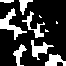

In [ ]:
# Closed
kernel = np.ones((5, 5))
closed_neck_mask = cv.morphologyEx(opened_neck_mask.astype(np.uint8), cv.MORPH_CLOSE, kernel.astype(np.uint8))
show(closed_neck_mask)